In [28]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.preprocessing import MinMaxScaler
import talib

In [29]:
input_data = 'data01/SBI_4_5_2021_4_5_2020.csv'

In [30]:
stockData = pd.Series([],dtype='float64') 
original_data = pd.read_csv(input_data)
ticker_list = original_data.iloc[(720*4):(720*5), 3].values.tolist()
ticker = np.asarray(ticker_list, dtype='float64')

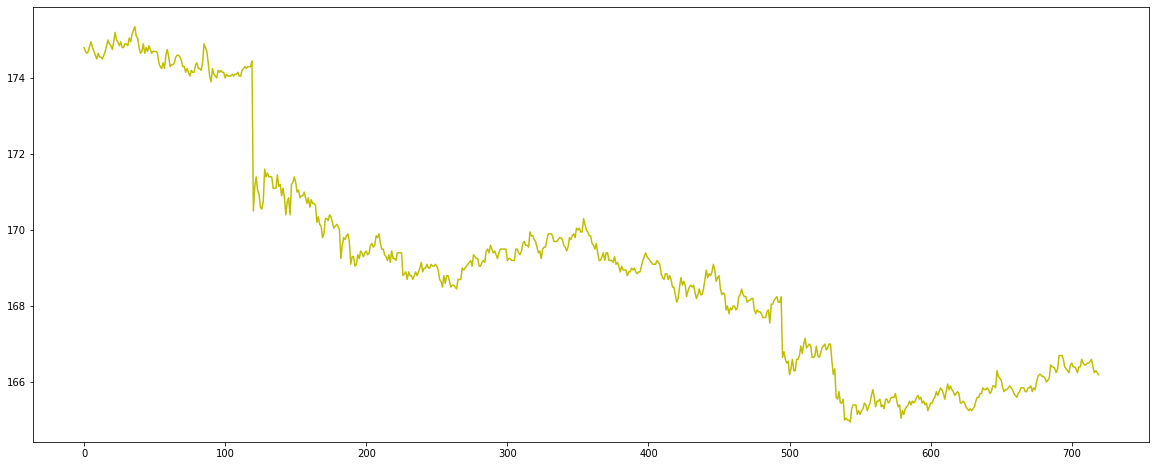

In [31]:
plt.figure(figsize=(20, 8))
plt.plot(ticker, c='y')
mom = talib.MOM(ticker, timeperiod=8)
rsi = talib.RSI(ticker, timeperiod=8)


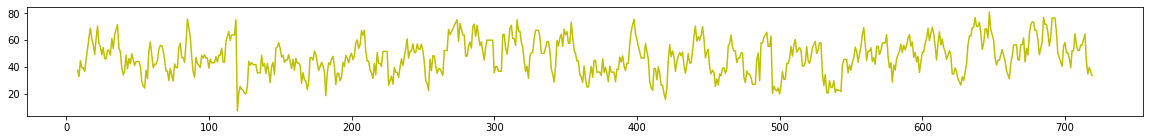

In [32]:
plt.figure(figsize=(20,2))
plt.plot(rsi, c='y')

In [33]:
any(rsi[-5:] > 56)

False

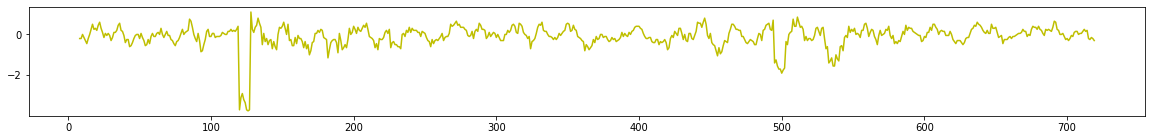

In [34]:
plt.figure(figsize=(20,2))
plt.plot(mom, c='y')

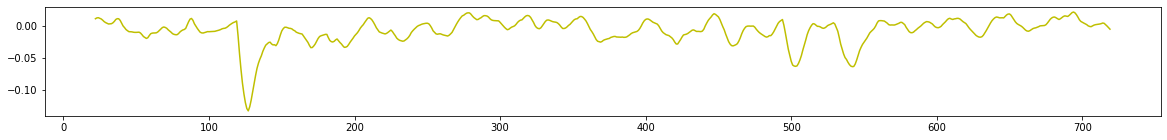

In [35]:
trix = talib.TRIX(ticker, timeperiod=8)
plt.figure(figsize=(20,2))
plt.plot(trix, c='y')

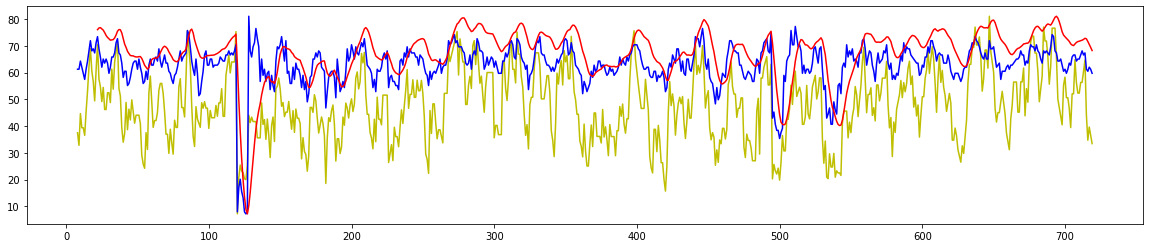

In [36]:
scaler = MinMaxScaler(feature_range=(np.nanmin(rsi),np.nanmax(rsi)))
scaled_mom = scaler.fit_transform(mom.reshape(-1,1))
scaled_trix = scaler.fit_transform(trix.reshape(-1,1))

plt.figure(figsize=(20,4))
plt.plot(rsi, c='y')
plt.plot(scaled_mom, c='b')
plt.plot(scaled_trix, c='r')

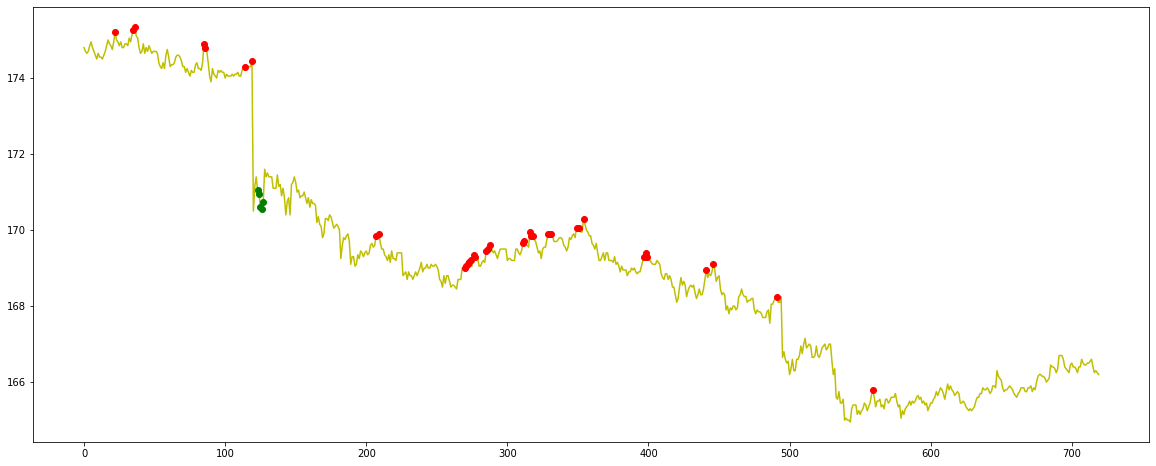

In [37]:
plt.figure(figsize=(20, 8))
plt.plot(ticker, c='y')
for i in range(0, 600):
    if rsi[i] <= 35 and scaled_trix[i] <=30 and scaled_mom[i] <= 45:
        plt.plot(i, ticker[i], c='g', marker='o')
    if rsi[i] >= 65 and scaled_trix[i] >= 70 and scaled_mom[i] >=55:
        plt.plot(i, ticker[i], c='r', marker='o')


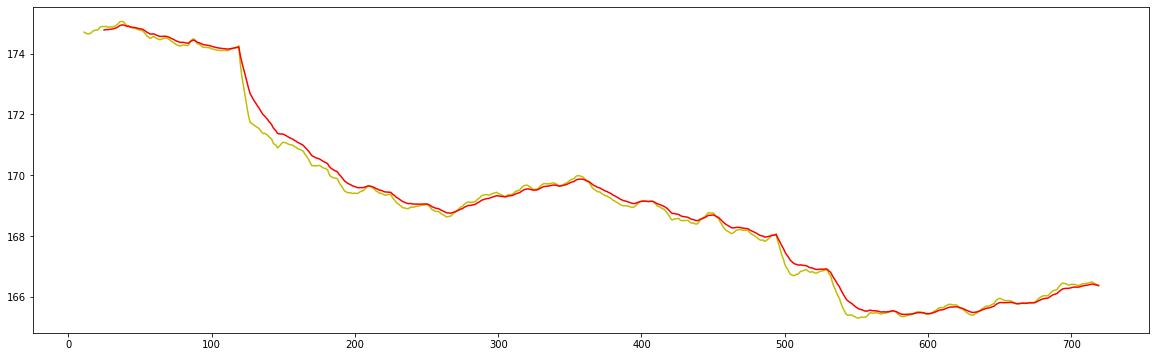

In [39]:
shortWindow = talib.EMA(ticker, timeperiod=12)
longWindow = talib.EMA(ticker, timeperiod=26)
plt.figure(figsize=(20, 6))
plt.plot(shortWindow, c='y')
plt.plot(longWindow, c='r')

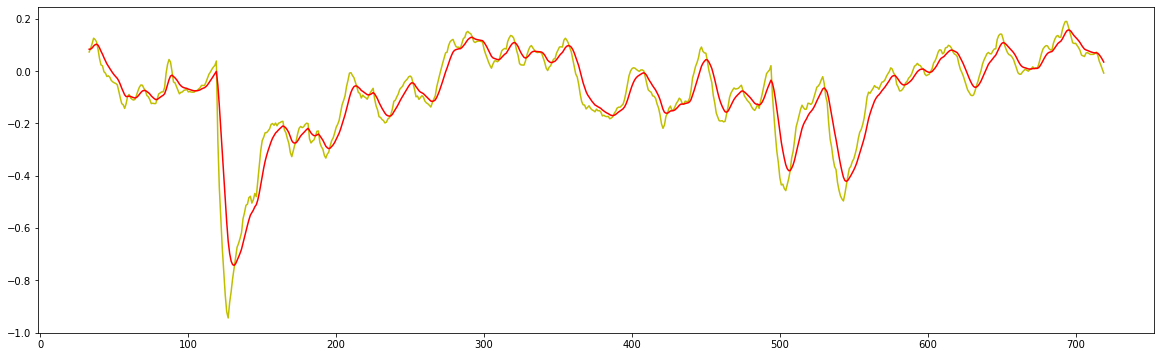

In [38]:
macd, macdsignal, macdhist = talib.MACD(ticker, fastperiod=12, slowperiod=26, signalperiod=9)
plt.figure(figsize=(20, 6))
plt.plot(macd, c='y')
plt.plot(macdsignal, c='r')


In [11]:
for i in range(0, 715):
    if rsi[i] <= 35 and scaled_trix[i] <=30 and scaled_mom[i] <= 45:
        print(i, rsi[i], scaled_trix[i], scaled_mom[i])
    

54 7.721253552799317 [25.6254632] [6.41888561]
55 23.90762319338239 [21.47781376] [15.89422847]
711 6.583065847891177 [27.51937854] [14.17143886]
712 5.73761982477647 [21.60055772] [8.14167522]
713 5.470001513925856 [16.63583487] [6.41888561]
714 3.8347012001367276 [11.09547053] [3.8347012]


In [12]:
for i in range(0, 715):
    if rsi[i] >= 65 and scaled_trix[i] >= 70 and scaled_mom[i] >=55:
        print(i, rsi[i], scaled_trix[i], scaled_mom[i])

84 67.8443275595769 [70.94540257] [64.99373233]
375 89.48850958711391 [70.38578799] [83.94441804]
376 91.74642969732164 [75.85505611] [92.55836608]
377 92.55836608208821 [82.05998986] [92.55836608]
378 73.87166970564498 [86.4398383] [83.94441804]
379 76.30186130594868 [89.64536758] [88.25139206]
380 77.49781796937046 [91.83865008] [90.83557647]
381 71.32705708812095 [92.55836608] [88.25139206]
382 71.32705708812095 [92.15241279] [87.38999725]
383 71.32705708812095 [90.93166359] [64.13233753]
586 67.44229052636614 [71.21762913] [71.88489077]
587 75.61389817549737 [73.11412524] [75.33046999]
588 69.88633569558745 [74.57052883] [72.74628557]
602 76.30037416295137 [71.18844668] [74.46907518]
604 67.51830007949803 [73.38572278] [66.71652194]
605 70.23814280100027 [74.13592978] [69.30070636]
606 67.03082808314188 [74.44630496] [71.88489077]
643 71.9492871690482 [70.33497876] [59.8253635]
644 67.60110536783604 [70.59385872] [62.40954792]
